# MiniNet - a small neural network

Illustrations and examples of using convolutional neural networks applied to images.

In [9]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

## Load the data

We use the MNIST digits dataset for the examples here.

In [10]:
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Input, Dense
from keras.layers import Activation, Flatten
from keras.layers import MaxPool2D

from keras.datasets import mnist
from keras import utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert our data into a rank 3 tensor
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float64)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

# For experimenting we could add some noise to each image
#X_train_noisy = X_train + 0.05 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

## Network Architecture

In [11]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [12]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
history_callback = convnet.fit(X_train, y_train,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 20s 465us/step - loss: 0.2229 - acc: 0.9337 - val_loss: 0.0762 - val_acc: 0.9769
Epoch 2/20
42000/42000 [==============================] - 19s 460us/step - loss: 0.0573 - acc: 0.9824 - val_loss: 0.0603 - val_acc: 0.9803
Epoch 3/20
42000/42000 [==============================] - 19s 460us/step - loss: 0.0397 - acc: 0.9881 - val_loss: 0.0464 - val_acc: 0.9862
Epoch 4/20
42000/42000 [==============================] - 19s 452us/step - loss: 0.0272 - acc: 0.9915 - val_loss: 0.0494 - val_acc: 0.9855
Epoch 5/20
42000/42000 [==============================] - 19s 463us/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0391 - val_acc: 0.9889
Epoch 6/20
42000/42000 [==============================] - 20s 464us/step - loss: 0.0177 - acc: 0.9944 - val_loss: 0.0529 - val_acc: 0.9853
Epoch 7/20
42000/42000 [==============================] - 19s 460us/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.

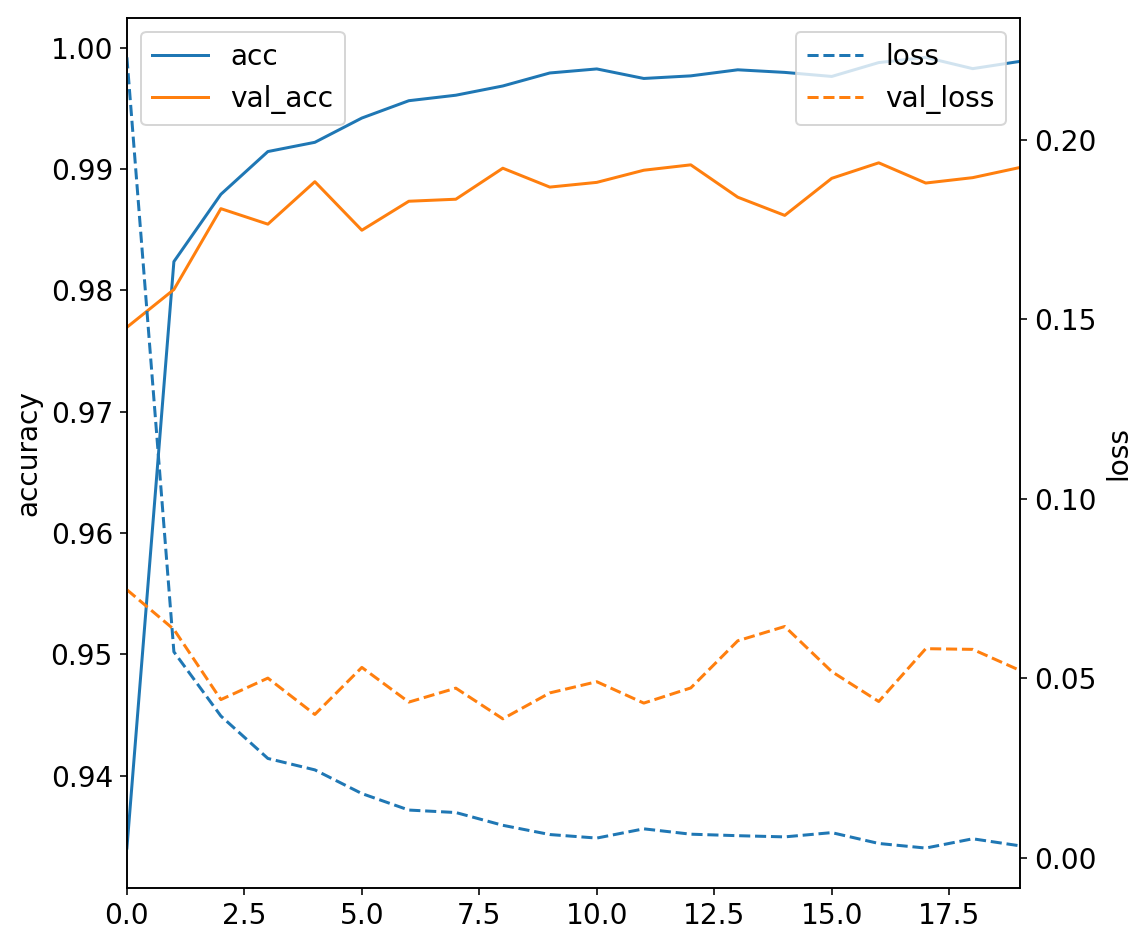

In [8]:
import pandas as pd


df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");